<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Antonio Rosas y Jose Antonio Castaño.

**Fecha:** 14 de marzo del 2021.

**Expediente** 713803 y 711469.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 13

**Link al repositorio en Github**: https://github.com/Tonydesanty/Tarea-7y8SPF

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
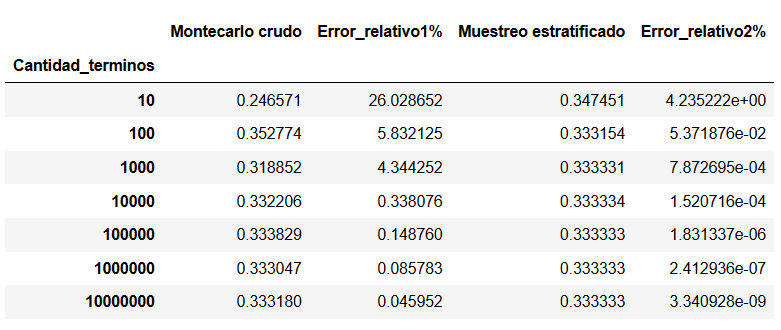

In [1]:
#librerias
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

### Solución Antonio Rosas

In [2]:
def integracion_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def muestreo_estratificado(n: 'Número de estratos'):
    u= np.random.uniform(a,b,n) 
    i=np.arange(0,n) 
    estratificacion = (u+i)/n 
    return estratificacion

In [3]:
I = 1/3 
a = 0
b = 1
N = np.logspace(1,7,7,dtype=int)
# data frame
res = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo1%', 
                                   'Muestreo estratificado', 'Error_relativo2%' ], dtype='float')
res.index.name = "Cantidad_terminos"
# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
ue= list(map(muestreo_estratificado, N)) #estratificar los valores
#aplicar método montecarlo con los ui generados
I_m= [integracion_montecarlo(lambda x:x**2, a, b, Y) for Y in ui]
#aplicar método montecarlo con varialbes estratificiadas 
I_e= [integracion_montecarlo(lambda x:x**2, a, b, Y) for Y in ue]
res.loc[N,"Montecarlo crudo"] = I_m
res.loc[N,"Error_relativo1%"] = np.abs(res.loc[N,"Montecarlo crudo"]-I)*100/I
res.loc[N,"Muestreo estratificado"] = I_e
res.loc[N,"Error_relativo2%"] = np.abs(res.loc[N,"Muestreo estratificado"]-I)*100/I

res

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.242207,27.338016,0.325305,2.408360e+00
100,0.321592,3.522393,0.332797,1.608299e-01
1000,0.334050,0.214931,0.333326,2.210630e-03
10000,0.332467,0.259989,0.333333,4.670616e-05
100000,0.332962,0.111342,0.333333,3.035433e-07
1000000,0.333344,0.003315,0.333333,5.611038e-08
10000000,0.333456,0.036855,0.333333,2.017186e-09


### Solución José Antonio Castaño

In [4]:
#1.Función del metodo montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [5]:
#1.funcion muestreo estratificado
def estrat(a, b, N):
    U2 = np.random.uniform(a, b, N)
    i = np.arange(0, N)
    var = (U2 + i) / N
    return var

In [6]:
#2.resultados de ambas en DataFrame

I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui_mon = list(map(lambda N:np.random.uniform(a,b,N),N)) #Int Montecarlo 
ui_es = list(map(lambda N: estrat(a,b,N),N)) #Muestreo Estratificado

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m_mon = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_mon)) #Montecarlo
I_m_es = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_es)) #Estratificado

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo crudo"] = I_m_mon
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo crudo"]-I)*100/I

df.loc[N,"Muestreo estratificado"] = I_m_es
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.335784,0.735187,0.329800,1.059993e+00
100,0.309436,7.169194,0.333037,8.888938e-02
1000,0.329224,1.232672,0.333346,3.917437e-03
10000,0.334892,0.467728,0.333334,8.490483e-05
100000,0.333352,0.005562,0.333333,5.609305e-07
1000000,0.333119,0.064441,0.333333,8.055535e-08
10000000,0.333271,0.018583,0.333333,3.689349e-09
